# An Example of loading files for analysis
## Sample: MQ460 Protonated 100uM

In [1]:
import sys
sys.path.append('/home/xuser/Desktop/huka/autoDeer/autoDeer/') # This is needed to be able to import the latest version of my code
import TwoD_Experiment
import deerlab as dl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

### Intial 2D Experiment

4Pulse times: (2.5, 4.4)


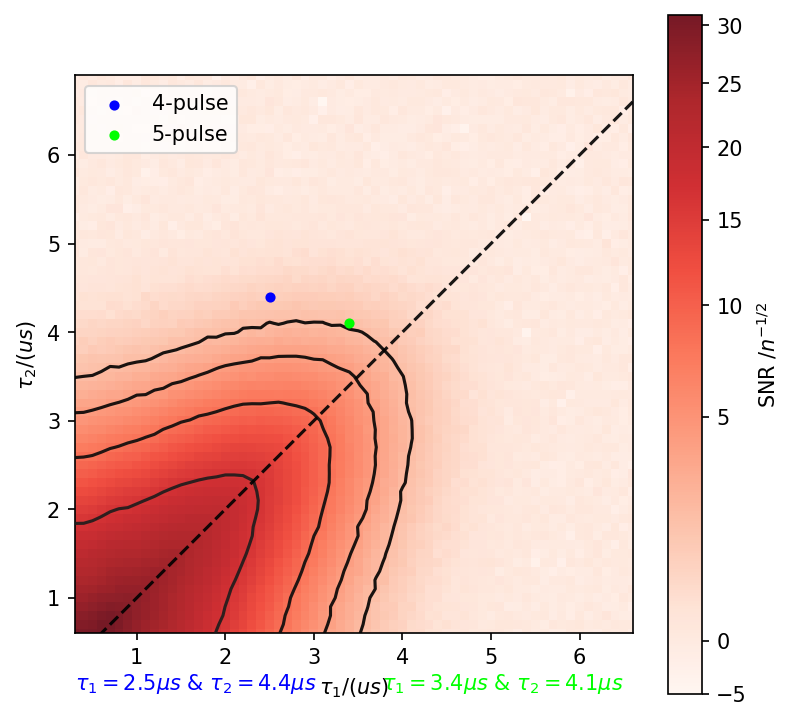

In [8]:
exp = TwoD_Experiment.TwoD_Experiment()
exp.set_snr_target(100)
exp.load('/home/xuser/xeprFiles/Data/HUKA/2021/2021_12_16_MQ460_25uM_H20_gly/2pDEC_50k_MQ460_25uM.DSC')
fig = exp.create_twoD_plot(norm='SNRpShot',contour='SNRpShot',optimal=True)
print('4Pulse times:',exp.time_4p)

In [15]:
print('4Pulse times:',exp.index_4p)
exp.data_snrpshot[22,38]*np.sqrt(3300)

4Pulse times: (22, 38)


122.4847148864642

## Initial DEER experiments

#### 90mins  $\tau_1 = 3.3\mu s$ and $\tau_2 = 5.1\mu s$

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 0.980785  RMSD  = 1.266445e+03
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  2.635e+04  Signal scale (arb.u.)
  bgparam[0]:   43.8289938  (0.0100000, 114.2395966)  Concentration of pumped spins (μM)
  exparam[0]:   0.1435659  (0.0935291, 0.1936026)  Modulation depth ()
----------------------------------------------------------------------------


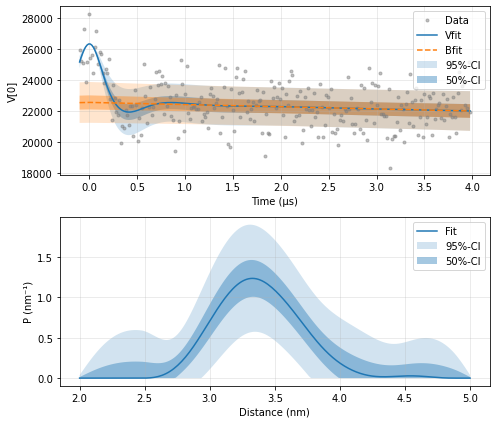

In [16]:
t, Vexp = dl.deerload('/home/xuser/xeprFiles/Data/HUKA/2021/2021_12_16_MQ460_25uM_H20_gly/DEER_50k_MQ460_H20_25uM_d1_2600_d2_4800.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a= fit.plot()